## The Sparks Foundation #GRIPAPRIL22
### Author - Himanshu Baswal, Data Science & Business Analytics Intern

## Task 1 : Prediction using Supervised Machine Learning

- Predict the percentage of an student based on the number of study hours.
- This is a simple linear regression task as it involves just 2 variables.
- You can use R, Python, SAS Enterprise Miner or any other tool
- What will be predicted score if a student studies for 9.25 hrs/day?

Dataset Sample : http://bit.ly/w-data

### 1) Import the Dataset and required libraries

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# import the dataset
path = "http://bit.ly/w-data"
data = pd.read_csv(path)
print("Data is imported")
data

Data is imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
#lets look at the first 5 records
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#Lets lookup at the descriptive statistics
data.describe(include = 'all')

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
data.shape

(25, 2)

The dataset contains 2 columns and 25 rows.

In [6]:
#Lets lookup at the null values and type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### 2) Visualizing the data

Let us visualize this data in a scatterplot of Score(y) vs Hours(x) to see its distribution.

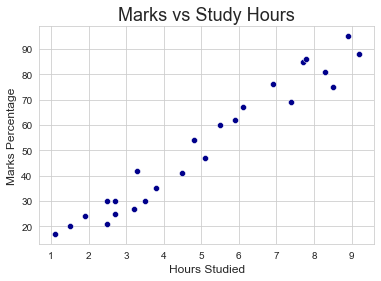

In [7]:
sns.set_style('whitegrid')
sns.scatterplot(y = data['Scores'], x = data['Hours'], color='darkblue')
plt.title('Marks vs Study Hours',size = 18)
plt.ylabel('Marks Percentage', size = 12)
plt.xlabel('Hours Studied', size = 12)
plt.show()

Now, lets draw a regression plot to see the relation between Scores and Hours.

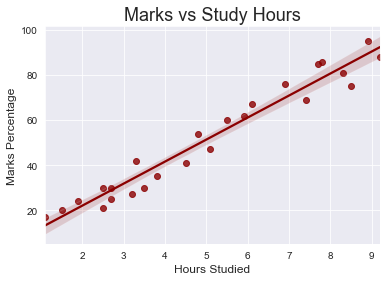

In [8]:
sns.set_style('darkgrid')
sns.regplot(y = data['Scores'], x = data['Hours'], color='darkred')
plt.title('Marks vs Study Hours',size = 18)
plt.ylabel('Marks Percentage', size = 12)
plt.xlabel('Hours Studied', size = 12)
plt.show()

In [9]:
#corr
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


The Regression plot confirms that Scores and Hours have a Positive Linear Relationship. The corr() values of 0.9761 also confirm the same.

### 3) Training the Model

#### 1) Splitting the Data

In [10]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, 1].values
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [11]:
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 0,test_size=0.2)

In [13]:
## We have Splitted Our Data Using 80:20 Rulee(PARETO)
print("X train.shape =", X_train.shape)
print("Y train.shape =", Y_train.shape)
print("X test.shape  =", X_test.shape)
print("Y test.shape  =", Y_test.shape)

X train.shape = (20, 1)
Y train.shape = (20,)
X test.shape  = (5, 1)
Y test.shape  = (5,)


#### 2) Fitting the Data into the model

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [15]:
lr = LinearRegression()
lr.fit(X_train,Y_train)
print("Model Training is Finished")

Model Training is Finished


In [16]:
#lets have a look at the intercept 
b0 = lr.intercept_
b0

2.018160041434683

In [17]:
#The coeff
b1 = lr.coef_
b1

array([9.91065648])

##### Plotting the Regression line equation
Yhat = lr.intercept_ + lr.coef_*X_train

#### 3) Test data

In [18]:
Y_pred = lr.predict(X_test)
Y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [19]:
Y_test

array([20, 27, 69, 30, 62], dtype=int64)

##### Comparing Actual vs Predicted Scores

In [20]:
Y_test1 = list(Y_test)
prediction=list(Y_pred)
df_compare = pd.DataFrame({ 'Actual':Y_test1,'Result':prediction})
df_compare

,Actual,Result
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### 4) Model Evaluation

#### Accuracy of the model

In [21]:
## Goodness of fit Test
metrics.r2_score(Y_test,Y_pred)

0.9454906892105356

## 94% of the model is a good model.

#### Predicting the Error

In [22]:
MSE = metrics.mean_squared_error(Y_test,Y_pred)
root_E = np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))
Abs_E = np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))
print("Mean Squared Error      = ",MSE)
print("Root Mean Squared Error = ",root_E)
print("Mean Absolute Error     = ",Abs_E)

Mean Squared Error      =  21.5987693072174
Root Mean Squared Error =  4.6474476121003665
Mean Absolute Error     =  4.6474476121003665


A Mean Absolute Error value of 4.647 indicates that the chances of errors are less in the model.

### 5) Question

What will be predicted score if a student studies for 9.25 hrs/day?

In [23]:
Predicted_score = lr.predict([[9.25]])
print("predicted score for a student studying 9.25 hours :", Predicted_score)

predicted score for a student studying 9.25 hours : [93.69173249]


### CONCLUSION

From the above result, we can predict that if a student studied for 9.25 hours then the student will secure 93.69 (~94) Marks.